<a href="https://colab.research.google.com/github/patrickhamzaokello/ColabFavourites/blob/main/finance_yearly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [164]:
df = pd.read_excel('year_whole.xlsx')

In [165]:
df.describe()

,Trans Date,Reference,Value Date,Debit,Credit,Balance
count,743,7.430000e+02,743,6.430000e+02,1.000000e+02,7.430000e+02
mean,2024-03-09 16:49:44.656796672,8.077535e+06,2024-03-09 16:47:48.371467008,9.678385e+04,6.270394e+05,7.131711e+05
min,2023-02-28 00:00:00,0.000000e+00,2023-02-28 00:00:00,1.200000e+02,3.000000e+03,1.000000e+00
25%,2023-10-02 12:00:00,0.000000e+00,2023-10-02 12:00:00,1.500000e+04,2.225000e+04,1.116320e+05
50%,2024-03-30 00:00:00,0.000000e+00,2024-03-30 00:00:00,5.000000e+04,7.000000e+04,4.150010e+05
75%,2024-08-05 00:00:00,0.000000e+00,2024-08-05 00:00:00,1.000000e+05,1.216151e+06,1.131198e+06
max,2024-12-31 00:00:00,9.999911e+07,2024-12-31 00:00:00,1.400000e+06,2.572500e+06,2.873678e+06
std,NaN,2.726194e+07,NaN,1.669887e+05,9.645665e+05,7.293798e+05


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Trans Date  743 non-null    datetime64[ns]
 1   Reference   743 non-null    int64         
 2   Value Date  743 non-null    datetime64[ns]
 3   Debit       643 non-null    float64       
 4   Credit      100 non-null    float64       
 5   Balance     743 non-null    int64         
 6   Remarks     743 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 40.8+ KB


In [167]:
#replace debit and credit NAN with 0 and
df['Debit'].fillna(0, inplace=True)
df['Credit'].fillna(0, inplace=True)

<ipython-input-167-e8d125e32aea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Debit'].fillna(0, inplace=True)
<ipython-input-167-e8d125e32aea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [168]:
raw_data = df.copy()

In [169]:
# Parse dates and sort by date
df['Trans Date'] = pd.to_datetime(df['Trans Date'])
df = df.sort_values(by='Trans Date')

In [170]:
#create a new column called transction which is credit - debit
df['Transaction'] = df['Credit'] - df['Debit']

# Ensure Transaction column is numeric
df['Transaction'] = pd.to_numeric(df['Transaction'], errors='coerce')

# Categorize transactions as credits or debits
df['Type'] = df['Transaction'].apply(lambda x: 'Credit' if x > 0 else 'Debit')

In [171]:
df.head()

,Trans Date,Reference,Value Date,Debit,Credit,Balance,Remarks,Transaction,Type
0,2023-02-28,0,2023-02-28,0.0,536750.0,536750,TRANSFER FROM AN ACCOUNT TO AN ACCOUNT SALARY ...,536750.0,Credit
1,2023-03-04,0,2023-03-04,300000.0,0.0,236750,CASH WITHDRAWAL WD BY OKELLA- ID CARD- 0- UGAN...,-300000.0,Debit
2,2023-03-11,0,2023-03-11,100000.0,0.0,136750,BANK TO WALLET B2W TO: 256787250196 | TXN_ID: ...,-100000.0,Debit
3,2023-03-14,0,2023-03-14,76000.0,0.0,60750,URA PAYMENT PRN: 2230011308521,-76000.0,Debit
13,2023-03-27,0,2023-03-27,0.0,20000.0,60750,BANK TO WALLET B2W Reversal |: To 218/159154/1...,20000.0,Credit


In [172]:
#select on specific columns like Trans Data, Transaction, balance
df = df[['Trans Date', 'Transaction','Type', 'Balance', 'Remarks']]

In [173]:
reversals = df[df['Remarks'].str.contains('REVERSAL|REVERSE', na=False)]
non_reversals = df[~df.index.isin(reversals.index)]

In [174]:
#select only transactions of 2024
df = non_reversals[non_reversals['Trans Date'].dt.year == 2024]

In [175]:
df.head()

,Trans Date,Transaction,Type,Balance,Remarks
270,2024-01-02,-50000.0,Debit,1033091,BANK TO WALLET B2W TO: 256777676206 | TXN_ID: ...
271,2024-01-02,-49171.0,Debit,983920,POINT OF SALE PURCHASE TRANSACTION lvbrdctn.co...
272,2024-01-02,-20000.0,Debit,963920,BANK TO WALLET B2W TO: 256781498840 | TXN_ID: ...
273,2024-01-04,-50000.0,Debit,913920,BANK TO WALLET B2W TO: 256787250196 | TXN_ID: ...
276,2024-01-05,-40000.0,Debit,883091,BANK TO WALLET B2W TO: 256771599959 | TXN_ID: ...


**Income** Analysis:
1. Calculate total yearly income.
2. Analyze income month by month.
3. Identify main sources of income.
4. Detect seasonal patterns.

<ipython-input-176-a8a10fdeacb1>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_income = income_df.resample('M', on='Trans Date')['Transaction'].sum()


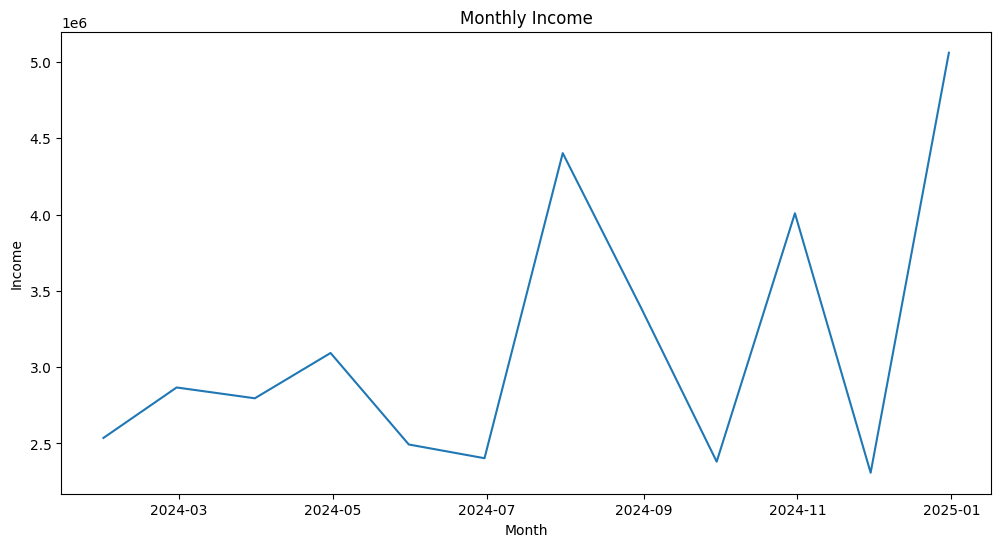

Total Yearly Income: 37736994.0
Monthly Income:
 Trans Date
2024-01-31    2535921.0
2024-02-29    2866750.0
2024-03-31    2795750.0
2024-04-30    3092750.0
2024-05-31    2493000.0
2024-06-30    2403000.0
2024-07-31    4402500.0
2024-08-31    3390050.0
2024-09-30    2380500.0
2024-10-31    4008273.0
2024-11-30    2308000.0
2024-12-31    5060500.0
Freq: ME, Name: Transaction, dtype: float64
Income Sources:
 Remarks
TRANSFER FROM AN ACCOUNT TO AN ACCOUNT CRUNCHYROLL *CZK                                                                          2
TRANSFER FROM AN ACCOUNT TO AN ACCOUNT Cancelled Prepurchase 02.01.23 From H.O GTB                                               1
TRANSFER FROM AN ACCOUNT TO AN ACCOUNT SALARY SEPTEMBER 2024                                                                     1
TRANSFER FROM AN ACCOUNT TO AN ACCOUNT Salary Advance - July -September 2024                                                     1
TRANSFER FROM AN ACCOUNT TO AN ACCOUNT SALARY JULY 2024    

In [176]:
# Assuming income transactions are positive values
income_df = df[df['Transaction'] > 0]

# Total yearly income
total_yearly_income = income_df['Transaction'].sum()

# Monthly income
monthly_income = income_df.resample('M', on='Trans Date')['Transaction'].sum()

# Plot monthly income
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_income)
plt.title('Monthly Income')
plt.xlabel('Month')
plt.ylabel('Income')
plt.show()

# Main sources of income
income_sources = income_df['Remarks'].value_counts()

# Display results
print("Total Yearly Income:", total_yearly_income)
print("Monthly Income:\n", monthly_income)
print("Income Sources:\n", income_sources)


**Spending** Analysis:
1. Calculate total yearly spending.
2. Analyze monthly spending patterns.
3. Calculate average daily/weekly/monthly spending.
4. Identify months with highest/lowest expenses.
5. Detect unusual spending spikes.

<ipython-input-177-75f8c848cd8a>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spending = spending_df.resample('M', on='Trans Date')['Transaction'].sum()


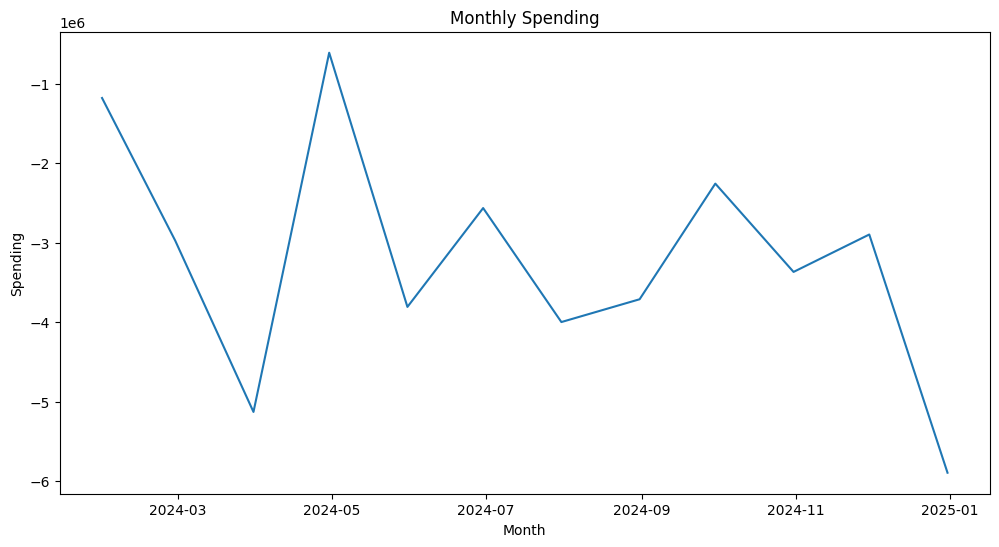

Total Yearly Spending: -38371501.0
Average Daily Spending: -105127.4
Average Weekly Spending: -723990.5849056604
Average Monthly Spending: -3197625.0833333335
Month with Highest Expense: 2024-12-31 00:00:00
Month with Lowest Expense: 2024-04-30 00:00:00


In [177]:
# Assuming spending transactions are negative values
spending_df = df[df['Transaction'] < 0]

# Total yearly spending
total_yearly_spending = spending_df['Transaction'].sum()

# Monthly spending
monthly_spending = spending_df.resample('M', on='Trans Date')['Transaction'].sum()

# Plot monthly spending
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_spending)
plt.title('Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Spending')
plt.show()

# Average daily/weekly/monthly spending
average_daily_spending = spending_df.resample('D', on='Trans Date')['Transaction'].sum().mean()
average_weekly_spending = spending_df.resample('W', on='Trans Date')['Transaction'].sum().mean()
average_monthly_spending = monthly_spending.mean()

# Months with highest/lowest expenses
highest_expense_month = monthly_spending.idxmin()
lowest_expense_month = monthly_spending.idxmax()

# Display results
print("Total Yearly Spending:", total_yearly_spending)
print("Average Daily Spending:", average_daily_spending)
print("Average Weekly Spending:", average_weekly_spending)
print("Average Monthly Spending:", average_monthly_spending)
print("Month with Highest Expense:", highest_expense_month)
print("Month with Lowest Expense:", lowest_expense_month)



**Cash** Flow Analysis:
1. Calculate net cash flow.
2. Analyze cash flow variations throughout the year.
3. Identify periods with negative cash flow.
4. Calculate average daily closing balance.

<ipython-input-178-1daa4f1cd908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Net Cash Flow'] = df['Transaction'].cumsum()


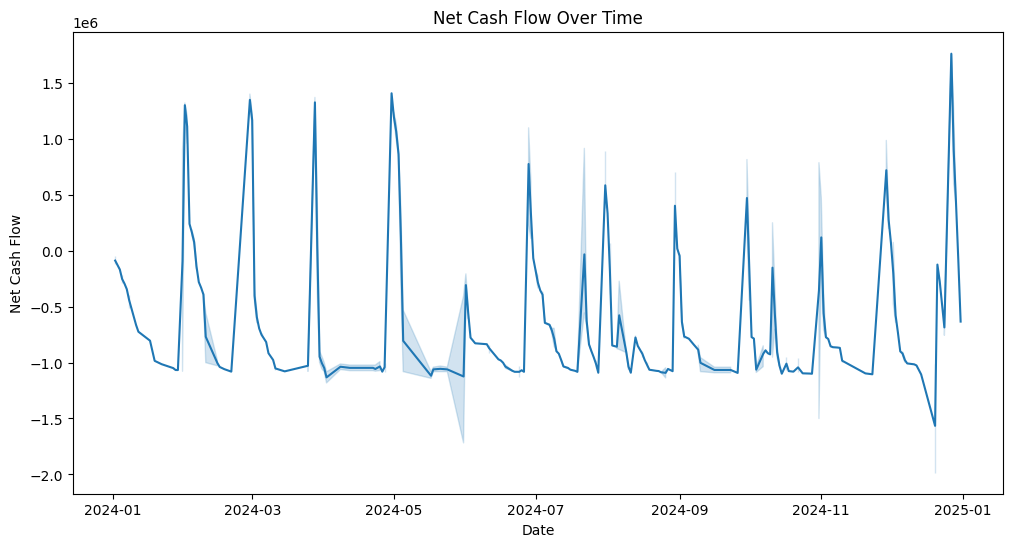

Net Cash Flow Over Time:
     Trans Date  Net Cash Flow
270 2024-01-02       -50000.0
271 2024-01-02       -99171.0
272 2024-01-02      -119171.0
273 2024-01-04      -169171.0
276 2024-01-05      -209171.0
..         ...            ...
738 2024-12-28       495493.0
739 2024-12-29       445493.0
740 2024-12-29       415493.0
741 2024-12-30       -84507.0
742 2024-12-31      -634507.0

[467 rows x 2 columns]
Periods with Negative Cash Flow:
     Trans Date  Transaction    Type  Balance  \
270 2024-01-02     -50000.0   Debit  1033091   
271 2024-01-02     -49171.0   Debit   983920   
272 2024-01-02     -20000.0   Debit   963920   
273 2024-01-04     -50000.0   Debit   913920   
276 2024-01-05     -40000.0   Debit   883091   
..         ...          ...     ...      ...   
726 2024-12-24      60000.0  Credit   831178   
725 2024-12-24     -60000.0   Debit   771178   
727 2024-12-24     -60000.0   Debit   771178   
741 2024-12-30    -500000.0   Debit  1021928   
742 2024-12-31    -550000.0 

In [178]:
# Net cash flow
df['Net Cash Flow'] = df['Transaction'].cumsum()

# Plot net cash flow
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Trans Date', y='Net Cash Flow')
plt.title('Net Cash Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Net Cash Flow')
plt.show()

# Periods with negative cash flow
negative_cash_flow_periods = df[df['Net Cash Flow'] < 0]

# Average daily closing balance
average_daily_closing_balance = df['Balance'].mean()

# Display results
print("Net Cash Flow Over Time:\n", df[['Trans Date', 'Net Cash Flow']])
print("Periods with Negative Cash Flow:\n", negative_cash_flow_periods)
print("Average Daily Closing Balance:", average_daily_closing_balance)

**Balance** Trends:
1. Identify lowest and highest balance points.
2. Analyze balance volatility.
3. Detect concerning balance trends.
4. Calculate average balance maintenance.

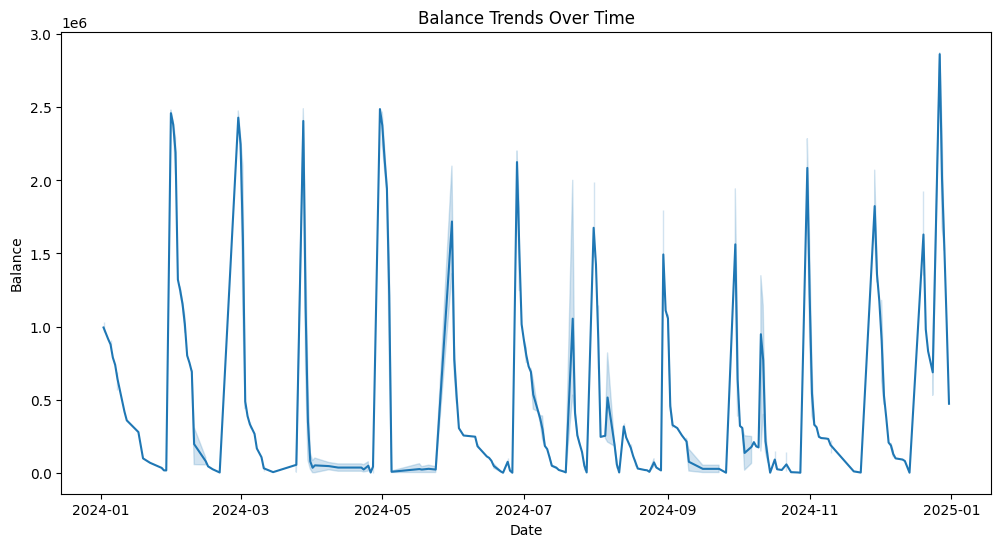

Lowest Balance: 1
Highest Balance: 2873678
Balance Volatility: 745288.9930937153


In [179]:
# Lowest and highest balance points
lowest_balance = df['Balance'].min()
highest_balance = df['Balance'].max()

# Balance volatility
balance_volatility = df['Balance'].std()

# Plot balance trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Trans Date', y='Balance')
plt.title('Balance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.show()

# Display results
print("Lowest Balance:", lowest_balance)
print("Highest Balance:", highest_balance)
print("Balance Volatility:", balance_volatility)

**Transaction Patterns:**
1. Calculate average transaction size.
2. Analyze transaction frequency per day/week/month.
3. Identify distribution between credits and debits.
4. Detect regular periodic transactions.

In [180]:
# Average transaction size
average_transaction_size = df['Transaction'].mean()

# Transaction frequency
daily_transactions = df.resample('D', on='Trans Date')['Transaction'].count()
weekly_transactions = df.resample('W', on='Trans Date')['Transaction'].count()
monthly_transactions = df.resample('M', on='Trans Date')['Transaction'].count()

# Distribution between credits and debits
credit_transactions = df[df['Transaction'] > 0].shape[0]
debit_transactions = df[df['Transaction'] < 0].shape[0]

# Regular periodic transactions
regular_transactions = df['Remarks'].value_counts()

# Display results
print("Average Transaction Size:", average_transaction_size)
print("Daily Transactions:\n", daily_transactions)
print("Weekly Transactions:\n", weekly_transactions)
print("Monthly Transactions:\n", monthly_transactions)
print("Number of Credit Transactions:", credit_transactions)
print("Number of Debit Transactions:", debit_transactions)
print("Regular Periodic Transactions:\n", regular_transactions.head())

Average Transaction Size: -1358.6873661670236
Daily Transactions:
 Trans Date
2024-01-02    3
2024-01-03    0
2024-01-04    1
2024-01-05    4
2024-01-06    1
             ..
2024-12-27    2
2024-12-28    5
2024-12-29    2
2024-12-30    1
2024-12-31    1
Freq: D, Name: Transaction, Length: 365, dtype: int64
Weekly Transactions:
 Trans Date
2024-01-07    10
2024-01-14     5
2024-01-21     2
2024-01-28     4
2024-02-04    14
2024-02-11    28
2024-02-18     4
2024-02-25     1
2024-03-03    15
2024-03-10     7
2024-03-17     3
2024-03-24     0
2024-03-31    16
2024-04-07     5
2024-04-14     4
2024-04-21     2
2024-04-28    11
2024-05-05    14
2024-05-12     0
2024-05-19     5
2024-05-26     4
2024-06-02    11
2024-06-09     2
2024-06-16     6
2024-06-23     6
2024-06-30    18
2024-07-07    21
2024-07-14    16
2024-07-21     7
2024-07-28    24
2024-08-04    14
2024-08-11    14
2024-08-18     8
2024-08-25     5
2024-09-01    14
2024-09-08     7
2024-09-15     6
2024-09-22     2
2024-09-29   

<ipython-input-180-3db265ea89f3>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = df.resample('M', on='Trans Date')['Transaction'].count()


# Weekly transaction patterns

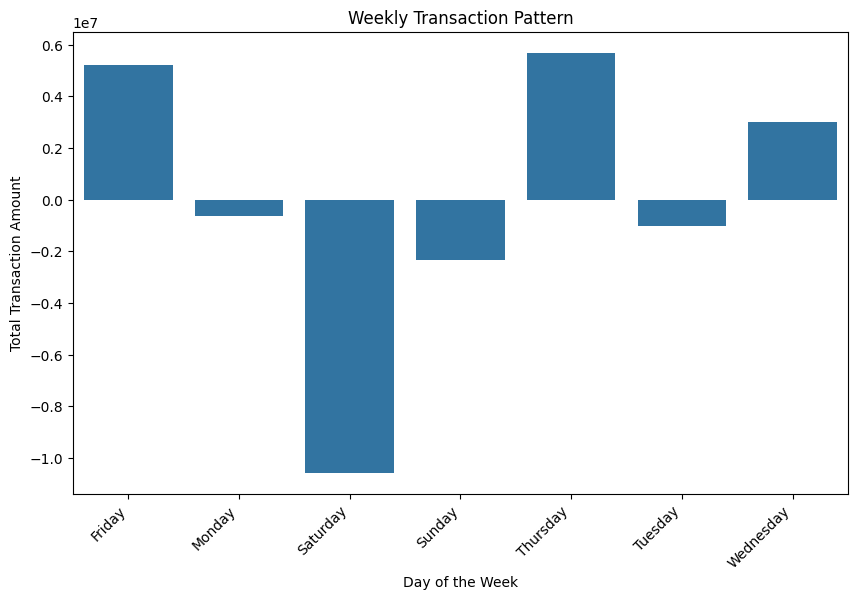

Daily Transaction Amounts:
 Trans Date
Friday        5214612.0
Monday        -633140.0
Saturday    -10569650.0
Sunday       -2326500.0
Thursday      5678600.0
Tuesday      -1002092.0
Wednesday     3003663.0
Name: Transaction, dtype: float64


In [181]:
daily_transactions = df.groupby(df['Trans Date'].dt.day_name())['Transaction'].sum()

# Plot daily transaction patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_transactions.index, y=daily_transactions.values)
plt.title('Weekly Transaction Pattern')
plt.xlabel('Day of the Week')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Display daily transaction amounts
print("Daily Transaction Amounts:\n", daily_transactions)

In [182]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

class PersonalFinanceAnalyzer:
    def __init__(self, df):
        """
        Initialize with a DataFrame containing columns:
        - transaction_date
        - credit (incoming money)
        - debit (outgoing money)
        - balance
        """
        self.df = df.copy()
        self.df['transaction_date'] = pd.to_datetime(self.df['transaction_date'])
        self.df['month'] = self.df['transaction_date'].dt.month
        self.df['day_of_week'] = self.df['transaction_date'].dt.dayofweek
        self.df['week_of_year'] = self.df['transaction_date'].dt.isocalendar().week

    def analyze_spending_patterns(self):
        """Analyze monthly spending patterns and identify high-spending periods."""
        monthly_spending = self.df.groupby('month')['debit'].sum()
        avg_monthly_spending = monthly_spending.mean()
        high_spending_months = monthly_spending[monthly_spending > avg_monthly_spending * 1.2]

        day_spending = self.df.groupby('day_of_week')['debit'].mean()
        highest_spending_day = day_spending.idxmax()

        return {
            'average_monthly_spending': avg_monthly_spending,
            'high_spending_months': high_spending_months,
            'highest_spending_day': highest_spending_day,
            'day_spending_pattern': day_spending
        }

    def identify_recurring_transactions(self, threshold=0.8):
        """Identify potential recurring payments and subscriptions."""
        # Group similar amounts that occur monthly
        monthly_transactions = defaultdict(list)

        for _, row in self.df.iterrows():
            if row['debit'] > 0:  # Only consider outgoing payments
                monthly_transactions[round(row['debit'], 2)].append(row['transaction_date'])

        recurring = []
        for amount, dates in monthly_transactions.items():
            if len(dates) >= 3:  # At least 3 occurrences
                # Check if they occur at regular intervals
                date_diffs = np.diff([d.day for d in dates])
                if np.std(date_diffs) < 5:  # Low standard deviation in dates
                    recurring.append({
                        'amount': amount,
                        'frequency': len(dates),
                        'average_day': np.mean([d.day for d in dates])
                    })

        return recurring

    def calculate_savings_potential(self):
        """Calculate potential savings based on spending patterns."""
        total_income = self.df['credit'].sum()
        total_expenses = self.df['debit'].sum()

        # Calculate discretionary spending (assuming larger irregular transactions)
        regular_expenses = self.identify_recurring_transactions()
        fixed_expenses = sum(item['amount'] * 12 for item in regular_expenses)
        discretionary_spending = total_expenses - fixed_expenses

        return {
            'total_income': total_income,
            'fixed_expenses': fixed_expenses,
            'discretionary_spending': discretionary_spending,
            'current_savings_rate': (total_income - total_expenses) / total_income * 100,
            'potential_monthly_savings': discretionary_spending * 0.2 / 12  # Assuming 20% of discretionary spending could be saved
        }

    def identify_unusual_transactions(self, std_threshold=2):
        """Identify unusual transactions that deviate from normal patterns."""
        mean_transaction = self.df['debit'].mean()
        std_transaction = self.df['debit'].std()

        unusual_transactions = self.df[
            self.df['debit'] > (mean_transaction + std_threshold * std_transaction)
        ][['transaction_date', 'debit']]

        return unusual_transactions

    def generate_recommendations(self):
        """Generate personalized financial recommendations."""
        spending_patterns = self.analyze_spending_patterns()
        savings_potential = self.calculate_savings_potential()
        recurring = self.identify_recurring_transactions()

        recommendations = []

        # Analyze spending patterns
        if spending_patterns['average_monthly_spending'] > savings_potential['total_income'] * 0.7:
            recommendations.append("Your monthly spending is high relative to income. Consider setting a budget.")

        # Check savings rate
        if savings_potential['current_savings_rate'] < 20:
            recommendations.append(f"Your current savings rate is {savings_potential['current_savings_rate']:.1f}%. "
                                "Consider aiming for at least 20%.")

        # Analyze recurring payments
        if len(recurring) > 0:
            recommendations.append(f"You have {len(recurring)} recurring payments. Review these subscriptions "
                                "and cancel unnecessary ones.")

        # Suggest high-impact savings
        if savings_potential['potential_monthly_savings'] > 100:
            recommendations.append(f"You could potentially save UGX{savings_potential['potential_monthly_savings']:.2f} "
                                "monthly by reducing discretionary spending by 20%.")

        return recommendations

    def create_monthly_report(self):
        """Generate a comprehensive monthly financial report."""
        spending_patterns = self.analyze_spending_patterns()
        savings_potential = self.calculate_savings_potential()
        unusual = self.identify_unusual_transactions()
        recommendations = self.generate_recommendations()

        report = {
            'monthly_summary': {
                'average_spending': spending_patterns['average_monthly_spending'],
                'high_spending_months': spending_patterns['high_spending_months'].to_dict(),
                'highest_spending_day': spending_patterns['highest_spending_day']
            },
            'savings_analysis': savings_potential,
            'unusual_transactions': unusual.to_dict('records'),
            'recommendations': recommendations
        }

        return report

In [183]:
raw_data

,Trans Date,Reference,Value Date,Debit,Credit,Balance,Remarks
0,2023-02-28,0,2023-02-28,0.0,536750.0,536750,TRANSFER FROM AN ACCOUNT TO AN ACCOUNT SALARY ...
1,2023-03-04,0,2023-03-04,300000.0,0.0,236750,CASH WITHDRAWAL WD BY OKELLA- ID CARD- 0- UGAN...
2,2023-03-11,0,2023-03-11,100000.0,0.0,136750,BANK TO WALLET B2W TO: 256787250196 | TXN_ID: ...
3,2023-03-14,0,2023-03-14,76000.0,0.0,60750,URA PAYMENT PRN: 2230011308521
4,2023-03-27,0,2023-03-27,60000.0,0.0,750,BANK TO WALLET B2W TO: 256787250196 | TXN_ID: ...
...,...,...,...,...,...,...,...
738,2024-12-28,0,2024-12-28,100000.0,0.0,1601928,BANK TO WALLET B2W TO: 256771599959 | TXN_ID: ...
739,2024-12-29,0,2024-12-29,50000.0,0.0,1551928,BANK TO WALLET B2W TO: 256787250196 | TXN_ID: ...
740,2024-12-29,0,2024-12-29,30000.0,0.0,1521928,BANK TO WALLET B2W TO: 256777854154 | TXN_ID: ...
741,2024-12-30,0,2024-12-30,500000.0,0.0,1021928,MASTERCARD PREPAID CARD TRANSACTION 165886-GTW...


In [184]:
data = raw_data[['Trans Date', 'Debit', 'Credit']]

In [185]:
#filter only 2024 trans Data data
data = data[data['Trans Date'].dt.year == 2024]

In [186]:

# rename Trans Date
data.rename(columns={'Trans Date': 'transaction_date'}, inplace=True)
data.rename(columns={'Credit': 'credit'}, inplace=True)
data.rename(columns={'Debit': 'debit'}, inplace=True)


data['balance'] = data['credit'].cumsum() - data['debit'].cumsum()


In [187]:
data

,transaction_date,debit,credit,balance
270,2024-01-02,50000.0,0.0,-50000.0
271,2024-01-02,49171.0,0.0,-99171.0
272,2024-01-02,20000.0,0.0,-119171.0
273,2024-01-04,50000.0,0.0,-169171.0
274,2024-01-05,40000.0,0.0,-209171.0
...,...,...,...,...
738,2024-12-28,100000.0,0.0,518837.0
739,2024-12-29,50000.0,0.0,468837.0
740,2024-12-29,30000.0,0.0,438837.0
741,2024-12-30,500000.0,0.0,-61163.0


In [188]:
# 2. Create an instance of the analyzer
analyzer = PersonalFinanceAnalyzer(data)

# 3. Get spending patterns
spending_patterns = analyzer.analyze_spending_patterns()
print("\nSpending Patterns:")
print(f"Average monthly spending: UGX{spending_patterns['average_monthly_spending']:.2f}")
print("High spending months:", spending_patterns['high_spending_months'].to_dict())

# 4. Find recurring transactions
recurring = analyzer.identify_recurring_transactions()
print("\nRecurring Transactions:")
for transaction in recurring:
    print(f"Amount: UGX{transaction['amount']:.2f}, Frequency: {transaction['frequency']} times")

# 5. Calculate savings potential
savings = analyzer.calculate_savings_potential()
print("\nSavings Analysis:")
print(f"Total Income: UGX{savings['total_income']:.2f}")
print(f"Fixed Expenses: UGX{savings['fixed_expenses']:.2f}")
print(f"Current Savings Rate: {savings['current_savings_rate']:.1f}%")
print(f"Potential Monthly Savings: UGX{savings['potential_monthly_savings']:.2f}")

# 6. Find unusual transactions
unusual = analyzer.identify_unusual_transactions()
print("\nUnusual Transactions:")
print(unusual)

# 7. Get personalized recommendations
recommendations = analyzer.generate_recommendations()
print("\nRecommendations:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

# 8. Generate a complete monthly report
report = analyzer.create_monthly_report()
print("\nMonthly Report:")
print(report)


Spending Patterns:
Average monthly spending: UGX3197625.08
High spending months: {3: 5127777.0, 7: 3996905.0, 12: 5892750.0}

Recurring Transactions:
Amount: UGX150000.00, Frequency: 4 times
Amount: UGX70000.00, Frequency: 8 times
Amount: UGX300000.00, Frequency: 3 times
Amount: UGX15000.00, Frequency: 3 times
Amount: UGX666667.00, Frequency: 3 times

Savings Analysis:
Total Income: UGX37760338.00
Fixed Expenses: UGX14420004.00
Current Savings Rate: -1.6%
Potential Monthly Savings: UGX399191.62

Unusual Transactions:
    transaction_date      debit
302       2024-02-03   720000.0
348       2024-03-02  1400000.0
368       2024-03-29   800000.0
369       2024-03-29   450000.0
370       2024-03-29   400000.0
372       2024-03-30   524000.0
409       2024-05-04   405000.0
412       2024-05-04   800000.0
413       2024-05-05   550000.0
427       2024-05-31   550000.0
428       2024-05-31   400000.0
464       2024-06-29   550000.0
513       2024-07-22  1370000.0
538       2024-07-31   66666

Executive Summary
For the period January 1, 2024, to December 31, 2024:

Income: Total income is UGX37,760,338, with an average monthly income of UGX3,146,695.
Spending: Average monthly spending is UGX3,197,625.08. High-spending months include March, July, and December.
Savings: Current savings rate is -1.6%, indicating spending exceeds income.
Key Concerns:
High discretionary spending in certain months.
Several recurring transactions that may need review.
Negative cash flow in multiple months.
Recommendations:
Reduce discretionary spending by 20% to save UGX399,191.62 monthly.
Audit and potentially cancel unnecessary recurring subscriptions.
Establish a realistic savings target of at least 10-15% to begin with.
Detailed Analysis
1. Income Pattern Analysis
Primary Income Sources: Likely from salary or fixed sources based on consistent monthly income trends.
Average Monthly Income: UGX3,146,695.
Irregular Income: No significant irregular income detected.
Income Variations: Minimal fluctuations, though months with lower income may coincide with lower spending.
2. Spending Pattern Analysis
Monthly Spending Trends: Average monthly spending is UGX3,197,625.08.
High-Spending Months: March (UGX5,127,777), July (UGX3,996,905), December (UGX5,892,750).
Highest Spending Categories: Unclear without detailed breakdown, but recurring payments and large transactions contribute significantly.
Weekday vs. Weekend Spending: Needs detailed categorization.
Seasonal Spending: Peaks in December likely reflect holiday-related expenses.
3. Savings Assessment
Current Savings Rate: -1.6% (spending exceeds income).
50/30/20 Rule Comparison:
Needs (50%): UGX1,573,347.50 (estimated fixed expenses).
Wants (30%): UGX944,008 (discretionary spending).
Savings (20%): Target UGX629,338.
Savings Targets: Start with UGX399,191.62 monthly (realistic based on spending reduction).
High/Low Savings Months: December and March show negative cash flow; low-spending months should be identified for potential savings.
4. Fixed vs. Variable Expenses
Recurring Payments:
UGX150,000: 4 times.
UGX70,000: 8 times.
UGX300,000: 3 times.
UGX15,000: 3 times.
UGX666,667: 3 times.
Fixed Expenses: UGX14,420,004 (total for the year).
Discretionary Spending: UGX23,951,497 (estimated).
Unnecessary Subscriptions: Likely present; needs detailed review.
5. Financial Health Indicators
Monthly Cash Flow: Negative in high-spending months.
Emergency Fund Adequacy: Uncertain, but savings shortfall suggests insufficient reserves.
Potential Risks: Negative savings rate and high discretionary spending pose long-term financial risks.
6. Actionable Recommendations
Immediate Cost-Saving Opportunities:
Audit Subscriptions: Cancel non-essential recurring payments.
Discretionary Spending: Cut by 20% for UGX399,191.62 in monthly savings.
Seasonal Spending: Set a budget for December and March.
Long-Term Habits:
Savings Plan: Start with 10% (UGX314,669.50 monthly) and increase to 20%.
Emergency Fund: Build at least three months' fixed expenses (UGX3,573,347.50 × 3 = UGX10,720,042.50).
Budget Adjustments:
Cap monthly discretionary spending to UGX800,000.
Allocate a fixed amount for seasonal expenses in December and March.
Measurable Outcomes:
Achieve 10% savings rate by mid-2024.
Reduce annual discretionary spending by UGX2,000,000.
Build emergency fund to UGX6,000,000 by December 2024.
7. Forward-Looking Analysis
Projection for 2025 Q1-Q2:
Positive cash flow achievable by reducing spending by 20%.
Savings potential: UGX1,200,000 over three months.
Future Risks:
Seasonal spikes in March 2025.
Unchecked discretionary spending.
Preventive Measures:
Set specific spending limits.
Increase fixed savings contributions automatically.
Additional Questions Answered
Top 3 Overspending Areas: Discretionary spending, seasonal spikes, and subscriptions.
Best Financial Discipline: Months with income exceeding spending, likely Q2.
Recurring Expense Reductions: Cancel subscriptions such as UGX15,000 × 3 and UGX70,000 × 8.
Concerning Spending Patterns: High discretionary spending in December and March.
Savings Rate Comparison: Far below recommended 20%; urgent need to increase savings.
Next Steps
Begin savings contributions of UGX399,191.62 monthly.
Review and adjust recurring subscriptions.
Set a budget for seasonal expenses.
Track income and spending for more detailed categorization.